<img src="uc3m-logo.jpg" alt="UC3M logo" width="200"/>

# Second Homework: Network Optimization and Non-linear Models (Topics 2, 3)
## BsC in Data Science and Engineering - Optimization and Analytics (2022-2023)

Author: Rodrigo Oliver Coimbra (NIA: 100451788)

## 1. Introduction (network optimization)

Companies and governments are facing increasingly complex and intricated problems that require rigorous assessment and monitoring, something that can be be accomplished through the use of mathemtical tools such as, for example, linear programming techniques. 

In today's world, competitiveness and productivity are of paramount importance when comparing businesses, estimating their revenue and determining their solvency. Many companies and governments are lagging behind in the implementation of rational, quantitative solutions that would otherwise enable them to enact the necessary measures to achieve their objectives; we need not to look any further than the report *Key factors behind productivity trends in euro area countries* released by the European Central Bank which states that:

> Productivity, defined broadly as efficiency in production, plays a key role in the economic resilience and social welfare of countries. Productivity growth influences the economy in important ways, affecting key variables such as output, employment and wages. Productivity is also relevant for monetary policy as it is a fundamental determinant of potential output growth and the natural rate of interest and, therefore, of the monetary policy space needed to deliver price stability over the medium term. As such, changes in productivity can influence the transmission mechanism of monetary policy and should be closely monitored.

and:

> [...] aggregate labour productivity growth has been trending downwards for decades, both in the euro area and in other major economies. Average annual growth in labour productivity – measured as real GDP per hour worked – in those euro area countries that have sufficiently long time series has continuously declined from about 7% in the 1960s to just 1% since the early 2000s [...]

Project management is not the only ingredient in the recipe for productivity and efficiency but it is nonetheless an important factor that has the potential of drastically improving these indicators and eliminating removable bottlenecks caused by suboptimal planning policies.

An article published by the Harvard Business Review Editors named *The Four Phases of Project Managament* argues that:

> [...] Many projects fail either because they bite off more than they can chew and thus grossly underestimate time and money or because a significant part of the problem has been overlooked. [...] Ask, "What will have to be done in order to accomplish X?". [...] Estimate how long it will take to complete these tasks and how much tey will cost in terms of dollars and person-hours. As a result of your thoughtful planning [...] you'll also have a good idea of how long the project will take.

HBR further elaborate that:

> [...] most projects come with fixed beginning and end dates, regardless of available resources. To create a realistic schedule within those constraints, work backward from any drop-dead deadlines you know about- that is, dates that cannot be changed- to see when your deliverables must be ready.

Business ought not to indulge in wishful thinking but instead focus on a rational allocation of capital, human resources and, crucially, time. For a comprehensive review of the impact of project management on productivity, refer to this report, published by the Association for Project Management, a British chartered professional organization.

Another article, by EY's Oceania Business Transformation Leader, Loretta Hudson, states that:

> Our research shows that miners that invest in the right project management capabilities and toolsets can reap between 1% and 30% of project value.

Bertsekas' book briefly mentions an example corresponding to the subject of Project Management (vide p.54) but does not elaborate any further on the matter. After doing some research on the subject, I discovered that network linear programming may be used to solve problems related with the Critical Path Method (CPM) and Program Evaluation and Review Technique (PERT).

While CPM/PERT and its derivative models do not cover or take into account all the factors involved in project management, they do provide useful insight into the dynamics of the problem to be addressed; accordingly, CPM was developed at DuPont and Remigton Rand in 1950s and PERT was designed by the United States Navy at the same period. These techniques represented a significant leap into modern project management with respect to other tools, such as Gantt charts.



## 2. Network optimization (with discrete variables)

### 2.0 Model explanation 

Managers and business owners face the classical problem of allocating resources, creating a sensible work flow and determining deadlines. Some common questions posed are: *When will the project be completed?*, *Which activities are critical for the correct completion of the project within a certain deadline?*, *Do we have enough resources to correctly complete the project?*, *Is the project running on schedule?*, *Are we using more resources than those budgeted?*, *Can we diminish the project duration with the lowest cost possible and how to so?*, etc.

In this network model we will focusing on the completion of a project within a certain specified deadline using the least possible cost, which would otherwise take much longer or extend beyond the deadline - deal-braker for most businesses.

For very simple projects, a heuristic approach by inspection may be used or calculated by hand using an appropiate algorithm (apart from the linear programming model, there are innumerable specialized algorithms for solving particular network problems). These approaches (the heuristic or hand-calculated), however, have serious limitations as they cannot be accomodate for larger projects, which mean that their solutions are far from being optimal and cannot therefore, be deemed to be fit for optimization.

#### 2.0.0 General conditions (Network Crashing with CPM/PERM)

In this particular model we will be using information organized according to CPM for obtaining the expected completion time of events and the usage of the least monetary resources to reduce the duration of the project, this is called **network crashing**.

We need a set of events and activities; events occur at a certain point in time and activities have a normal duration, normal cost, reduced (crashed) duration and reduced (crashed) cost.

It is clear that some activities depend on the successful completion of others and cannot be iniatiated earlier. We will be using events to connect and codify these dependency relationships between activities. Dummy activities may be added to ensure the logical value of the project is preserved. Bear in mind that dummy activities have no normal duration and thus cannot be reduced (crashed).

#### 2.0.1 Specific conditions

The network below corresponds to a CPM project network; this is extremely flexible as it can represent either physical or abstract events and activities for any kind of activities for any scale: small, medium or large endeavors. 

In this case we focus on the CPM project network of a given company that it is interested in knowing which would be the least amount of money that would be invested in order to finish the project is less time, namely, before the deadline that is specified and, perhaps most importantly, knowing in which activities to do so and in what amount.

The problem start with the initial state 0 and ends with the final states 21. There are in total 22 events (nodes) and 28 activities (arcs), which means that the incidence matrix of this network has 616 entries.

<img src="network_diagram2.svg" alt="Project management network"/>

As explained in the previous subsection, all activities have a name, normal duration, normal cost, reduced (crashed) duration and reduced (crashed) cost. This information is given in the following table for this specific project:

| Activities | Predecessor(s) | Normal time (in days) | Crash time (in days) | Normal cost (in USD) | Crash cost (in USD) |
|------------|----------------|-----------------------|----------------------|----------------------|---------------------|
| A          | -              | 5                     | 2                    | 1,000                | 1,500               |
| B          | A              | 2                     | 1                    | 1,500                | 2,000               |
| C          | B              | 10                    | 3                    | 5,500                | 7,000               |
| D          | A              | 3                     | 1                    | 250                  | 500                 |
| E          | D              | 7                     | 2                    | 400                  | 650                 |
| F          | E, Dummy 1     | 5                     | 1                    | 500                  | 750                 |
| G          | E, Dummy 1     | 6                     | 2                    | 700                  | 800                 |
| H          | F              | 2                     | 1                    | 500                  | 900                 |
| I          | G              | 3                     | 1                    | 100                  | 300                 |
| J          | G              | 15                    | 4                    | 3,500                | 5,500               |
| K          | H              | 12                    | 3                    | 3,000                | 4,750               |
| L          | I              | 4                     | 1                    | 600                  | 800                 |
| M          | J              | 8                     | 3                    | 1,000                | 1,400               |
| N          | K, L, M        | 5                     | 2                    | 700                  | 1,000               |
| O          | K, L, M        | 10                    | 1                    | 2,800                | 3,100               |
| P          | N              | 20                    | 3                    | 6,000                | 6,900               |
| Q          | O              | 5                     | 2                    | 700                  | 800                 |
| R          | O              | 2                     | 1                    | 300                  | 450                 |
| S          | P              | 3                     | 1                    | 200                  | 300                 |
| T          | P              | 15                    | 3                    | 4,000                | 4,700               |
| U          | Q              | 21                    | 5                    | 6,000                | 8,500               |
| V          | R              | 30                    | 8                    | 10,500               | 16,000              |
| W          | S, Y           | 10                    | 3                    | 3,800                | 4,000               |
| X          | W, Dummy 2     | 3                     | 1                    | 200                  | 250                 |
| Y          | C              | 2                     | 1                    | 3,000                | 3,500               |
| Z          | T              | 5                     | 2                    | 1,500                | 2,000               |
| Dummy 1    | C              | 0                     | 0                    | 0                    | 0                   |
| Dummy 2    | U, V, Z        | 0                     | 0                    | 0                    | 0                   |

### 2.1 General formulation

* **Decision variables**:
    * **X**: Point in time (in this case days) when event $i$ takes place, with $0 \leq i \leq 21$. Therefore $V = 22$.
    * **y**: Reduction in time units (in this case days) that activity $j$ is subject to, with $0 \leq j \leq 27$. Therefore $A = 28$.

* **Objective function**: <span style="color:red">Minimize</span> the cost of reducing the projct duration (crashing) per the product between the reduction (crash) cost per activity $j$ per time unit.

$$\min_{y_j}\sum_{j=0}^{A-1}c_j·y_j$$

* **Constraints**:
    * **Crash time constraints**: the crash time for a given activity j must be lesser or equal to the difference between the normal and crashed times for that activity. ($n_j$ stands for the normal duration of activity $j$ and $r_j$ stands for the reduced duration of activity $j$).
    
    $$y_j \leq n_j - r_j$$

    * **Network (limit) constraints**: the time where a certain event $i$ (node $i$)
    is reached (with respect with the initial event time of 0) is always greater or equal to
    the result of the normal duration of activity $j$ that is related with the occurrence of 
    the event, minus the crashing time of the said activity $j$ plus the occurrence time of
    the predecessor event $k$ (node $k$) where the activity $j$ originates from.
    
    $$x_i \leq n_j - y_j + x_k \quad \forall \quad 0 \leq i \leq V, \quad j = \{k, i\}$$

    * **Project completion constraints**: the time occurence of the initial event is equal to 0 and that the conclusion date of the project must be lesser or equal than the deadline that is specified.

    $$x_0 = 0$$
    $$x_{V-1} = d, \quad d \triangleq \text{deadline}$$

    * **Non-negativity and discrete value of the solution**: the value of either $x_i$ or $y_j$ must always be larger or equal to zero, as they represent amount of time.
    $$x_i \in \mathbb{Z}^{+} \cup \{0\} \quad \forall \quad 0 \leq i \leq V-1$$
    $$y_j \in \mathbb{Z}^{+} \cup \{0\} \quad \forall \quad 0 \leq j \leq A-1$$

    With respect to this last constraint, we **integrality theorem** states that:

    > Project completion constraints establish that the time occurence of the initial event is equal to 0 and that the conclusion date of the project must be lesser or equal than the deadline that is specified.

    given that the network crashing problem is a subvariant of the minimum cost network flow problem, we can apply this nice result to our problem, which means that vanilla linear programming with the simplex algorithm that is employed for continuous problems can be used without the need for additional methods or the burden of more complex algorithms for solving discrete problems. We will be checking that this theorem indeed holds by intentionally creating the variables and setting them with domain in the reals and then checking that the result is nonetheless discrete.

### 2.2 Python implementation of network concepts

In [1]:
# We import the libraries that are needed
# for solving linear programming problems
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

# For better data manipulation
# we import Numpy, the Numeric Python library
import numpy as np

# For performance analysis purposes
from time import process_time

# For saving the results returned by the solver
from pandas import Series, DataFrame

# For better code readability and maintanability
from typing import Final, List, Dict
from dataclasses import dataclass

In [2]:
class Activity:
    """
    This class defines the activities that make up the project to be crashed (optimized),
    each activity has a name (to make it more human-readable), a start event, an end event,
    a normal duration, a crashed duration, the normal cost that it represents and the cost
    that crashing would entail.
    """
    
    def __init__(self, name: str, start: int, end: int, normal_time: int, crash_time: int, normal_cost: int, crash_cost: int):
        self.name = name
        self.start = start
        self.end = end
        self.normal_time = normal_time
        self.crash_time = crash_time
        self.normal_cost = normal_cost
        self.crash_cost = crash_cost
        
        if normal_cost == 0 or crash_time == 0:
            self.C = 0
        else:
            #self.C = int((crash_cost - normal_cost)/(normal_time - crash_time))
            self.C = (crash_cost - normal_cost)/(normal_time - crash_time)

def generateA (A: np.ndarray, start_nodes: List[int], end_nodes: List[int]) -> None:
    """
    This function takes an empty matrix A, a list of 
    starting nodes and a list of ending ones; it converts
    it into an incidence matrix of the activities (arcs)
    and events (nodes)
    """
    
    count = 0
    for i in zip(start_nodes,end_nodes):
        A[i[0]][count] = 1
        A[i[1]][count] = -1
        count+=1
    
    return

def startNodes(alist: List[int]) -> List[int]:
    """Returns the list of starting events (nodes)"""
    return [(a.start) for a in alist]

def endNodes(alist: List[int]) -> List[int]:
    """Returns the list of ending events (nodes)"""
    return [(a.end) for a in alist]

def diffTime(alist: List[int]) -> List[int]:
    """Returns the time difference between
    the normal duration and the crash one"""
    return [(a.normal_time - a.crash_time) for a in alist]

def cValues(alist: List[int]) -> List[int]:
    """Returns the cost-to-time ratio"""
    return [a.C for a in alist]

def normalTime(alist: List[int]) -> List[int]: 
    """Returns the normal time duration by activity"""
    return [a.normal_time for a in alist]

def networkDict(alist: List[int], nodes: int, arcs: int, M: np.ndarray) -> Dict:
    """
    Returns a dictionary containing the following information:
    (i,j):(a,b) where (i,j) are the rows and columns of the incidence
    matrix - respectively - and (a,b) represent the start and end
    nodes of a give activity.
    """
    
    temp = {}
    res = {}
    for i, e in enumerate(alist):
        temp[i] = (e.start, e.end)
    for i in range(nodes):
        for j in range(arcs):
            if M[i][j] == -1:
                res[(i,j)] = temp[j]
    return res

def uniqueEndNodes(alist: List[int]) -> int:
    """Returns a list of unique end nodes"""
    return len(set(endNodes(alist)))

def numberNodes(alist: List[int]) -> int:
    """Returns the number of unique nodes in the model"""
    return len(set(endNodes(alist))) + 1

### 2.3 Data creation and manipulation

In [3]:
# We create the activity arcs between the
# event nodes with all the necessary information

activity_list = [
    Activity('A', 0, 1, 5, 2, 1_000, 1_500),
    Activity('B', 1, 2, 2, 1, 1_500, 2_000),
    Activity('C', 2, 3, 10, 3, 5_500, 7_000),
    Activity('D', 1, 4, 3, 1, 250, 500),
    Activity('E', 4, 5, 7, 2, 400, 650),
    Activity('F', 5, 6, 5, 1, 500, 750),
    Activity('G', 5, 7, 6, 2, 700, 800),
    Activity('H', 6, 8, 2, 1, 500, 900),
    Activity('I', 7, 9, 3, 1, 100, 300),
    Activity('J', 7, 10, 15, 4, 3_500, 5_500),
    Activity('K', 8, 11, 12, 3, 3_000, 4_750),
    Activity('L', 9, 11, 4, 1, 600, 800),
    Activity('M', 10, 11, 8, 3, 1_000, 1_400),
    Activity('N', 11, 12, 5, 2, 700, 1_000),
    Activity('O', 11, 13, 10, 1, 2_800, 3_100),
    Activity('P', 12, 14, 20, 3, 6_000, 6_900),
    Activity('Q', 13, 18, 5, 2, 700, 800),
    Activity('R', 13, 19, 2, 1, 300, 450),
    Activity('S', 14, 15, 3, 1, 200, 300),
    Activity('T', 14, 16, 15, 3, 4_000, 4_700),
    Activity('U', 18, 20, 21, 5, 6_000, 8_500),
    Activity('V', 19, 20, 30, 8, 10_500, 16_000),
    Activity('W', 15, 17, 10, 3, 3_800, 4_000),
    Activity('X', 17, 21, 3, 1, 200, 250),
    Activity('Y', 3, 15, 2, 1, 3_000, 3_500),
    Activity('Z', 16, 20, 5, 2, 1_500, 2_000),
    Activity('Dummy 1', 3, 5, 0, 0, 0, 0),
    Activity('Dummy 2', 20, 17, 0, 0, 0, 0)
]

# Define three important constants:
# the number of events (nodes); the number of
# activities (arcs); and the deadline in days
# of the project
V: Final = numberNodes(activity_list)
A: Final = len(activity_list)
DEADLINE: Final = 60

# Check that E and A are equal
# to their theoretical value
assert V == 22
assert A == 28

# Obtain two lists: one with the 
# starting nodes and another one
# with the ending ones
start_nodes = startNodes(activity_list)
end_nodes = endNodes(activity_list)

# Create a E times A incidence matrix
# in this case it has 22*28 = 616 entries
M = np.zeros((V, len(end_nodes)))
generateA(M, start_nodes, end_nodes)

# Check that M has the correct shape
assert M.shape == (V, A)

# Create a dictionary with all the necessary 
# information to implement the network constraints
activity_dict = networkDict(activity_list, V, A, M)

# Check that number of elements in the dictionary
# correspond to the number of activities
assert len(activity_dict) == A

# Print the dictionary
print(f"{activity_dict=}")

activity_dict={(1, 0): (0, 1), (2, 1): (1, 2), (3, 2): (2, 3), (4, 3): (1, 4), (5, 4): (4, 5), (5, 26): (3, 5), (6, 5): (5, 6), (7, 6): (5, 7), (8, 7): (6, 8), (9, 8): (7, 9), (10, 9): (7, 10), (11, 10): (8, 11), (11, 11): (9, 11), (11, 12): (10, 11), (12, 13): (11, 12), (13, 14): (11, 13), (14, 15): (12, 14), (15, 18): (14, 15), (15, 24): (3, 15), (16, 19): (14, 16), (17, 22): (15, 17), (17, 27): (20, 17), (18, 16): (13, 18), (19, 17): (13, 19), (20, 20): (18, 20), (20, 21): (19, 20), (20, 25): (16, 20), (21, 23): (17, 21)}


### 2.4 Network Linear Programming implementation

#### 2.4.1 Problem data definition: sets and parameters

In [4]:
# We create the Pyomo model to be used
network_model = pyo.ConcreteModel()

# Create two lists: one for the event labels
# and another one for the activities labels
# to be used a Sets for the model
event_labels = [v for v in range(V)]
activity_labels = [a for a in range(A)]

# Initialize both of these lists to the model,
# with the events corresponding to the i dimension
# and the activities corresponding to the j dimension
network_model.i = pyo.Set(initialize=event_labels)
network_model.j = pyo.Set(initialize=activity_labels)

# Fetch the c values for all activities in the model
c = cValues(activity_list)
# Initialize these values into the model as parameters
network_model.costs = pyo.Param(network_model.j, initialize=c, doc="Cost in monetary units per activity per time unit")

# Fetch the normal time values for all activities in the model
normal_time = normalTime(activity_list)
# Initialize these values into the model as parameters
network_model.normaltime = pyo.Param(network_model.j, initialize=normal_time, doc="Normal time in days for the completion of a given activity")

# Fetch the difference between normal and crashed times
# for all activities in the model
diff_time = diffTime(activity_list)
# Initialize these values into the model as parameters
network_model.timediff = pyo.Param(network_model.j, initialize=diff_time, doc="Time difference in days between the normal time and the crash time")

#### 2.4.2 Define the variables

In [5]:
# Define and add to the model the x and y variables,
# living in the i and j dimensions, respectively
network_model.x = pyo.Var(network_model.i, within=pyo.NonNegativeReals)
network_model.y = pyo.Var(network_model.j, within=pyo.NonNegativeReals)

# Print the variables that were generated
network_model.x.pprint()
network_model.y.pprint()

x : Size=22, Index=i
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      0 :     0 :  None :  None : False :  True : NonNegativeReals
      1 :     0 :  None :  None : False :  True : NonNegativeReals
      2 :     0 :  None :  None : False :  True : NonNegativeReals
      3 :     0 :  None :  None : False :  True : NonNegativeReals
      4 :     0 :  None :  None : False :  True : NonNegativeReals
      5 :     0 :  None :  None : False :  True : NonNegativeReals
      6 :     0 :  None :  None : False :  True : NonNegativeReals
      7 :     0 :  None :  None : False :  True : NonNegativeReals
      8 :     0 :  None :  None : False :  True : NonNegativeReals
      9 :     0 :  None :  None : False :  True : NonNegativeReals
     10 :     0 :  None :  None : False :  True : NonNegativeReals
     11 :     0 :  None :  None : False :  True : NonNegativeReals
     12 :     0 :  None :  None : False :  True : NonNegativeReals
     13 :     0 :  None :  None : False :  True : N

#### 2.4.3 Define the objective function

In [6]:
def n_objective(n_model: pyo.ConcreteModel) -> bool:
    """
    The objective function is given by the minimization of the sum
    of the unit crashing cost times the crashing time units over 
    all the model activities
    """
    
    return sum(n_model.costs[j]*n_model.y[j] for j in n_model.j)

# Add the objective function rule into the model
# Even though Pyomo by default performs minimization
# it is marked explicitly here
network_model.objective = pyo.Objective(rule=n_objective, sense=pyo.minimize)


# Print the objective function
network_model.objective.pprint()

objective : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : 166.66666666666666*y[0] + 500.0*y[1] + 214.28571428571428*y[2] + 125.0*y[3] + 50.0*y[4] + 62.5*y[5] + 25.0*y[6] + 400.0*y[7] + 100.0*y[8] + 181.8181818181818*y[9] + 194.44444444444446*y[10] + 66.66666666666667*y[11] + 80.0*y[12] + 100.0*y[13] + 33.333333333333336*y[14] + 52.94117647058823*y[15] + 33.333333333333336*y[16] + 150.0*y[17] + 50.0*y[18] + 58.333333333333336*y[19] + 156.25*y[20] + 250.0*y[21] + 28.571428571428573*y[22] + 25.0*y[23] + 500.0*y[24] + 166.66666666666666*y[25]


#### 2.4.4 Define the constraints

In [7]:
##########################
# CRASH TIME CONSTRAINTS #
##########################

def crash_time_constraints(n_model: pyo.ConcreteModel, j: int) -> bool:
    """Crash time constraints establish that the crash time
    for a given activity j must be lesser or equal to the difference
    between the normal and crashed times for that activity
    """
    
    return n_model.y[j] <= n_model.timediff[j]

# Add the crash time constraint into the model
network_model.crash_time = pyo.Constraint(network_model.j, rule=crash_time_constraints)
# Print the crash time constraints
network_model.crash_time.pprint()


crash_time : Size=28, Index=j, Active=True
    Key : Lower : Body  : Upper : Active
      0 :  -Inf :  y[0] :   3.0 :   True
      1 :  -Inf :  y[1] :   1.0 :   True
      2 :  -Inf :  y[2] :   7.0 :   True
      3 :  -Inf :  y[3] :   2.0 :   True
      4 :  -Inf :  y[4] :   5.0 :   True
      5 :  -Inf :  y[5] :   4.0 :   True
      6 :  -Inf :  y[6] :   4.0 :   True
      7 :  -Inf :  y[7] :   1.0 :   True
      8 :  -Inf :  y[8] :   2.0 :   True
      9 :  -Inf :  y[9] :  11.0 :   True
     10 :  -Inf : y[10] :   9.0 :   True
     11 :  -Inf : y[11] :   3.0 :   True
     12 :  -Inf : y[12] :   5.0 :   True
     13 :  -Inf : y[13] :   3.0 :   True
     14 :  -Inf : y[14] :   9.0 :   True
     15 :  -Inf : y[15] :  17.0 :   True
     16 :  -Inf : y[16] :   3.0 :   True
     17 :  -Inf : y[17] :   1.0 :   True
     18 :  -Inf : y[18] :   2.0 :   True
     19 :  -Inf : y[19] :  12.0 :   True
     20 :  -Inf : y[20] :  16.0 :   True
     21 :  -Inf : y[21] :  22.0 :   True
     22 :  -In

In [8]:
#######################
# NETWORK CONSTRAINTS #
#######################

def network_limit_constraints(n_model: pyo.ConcreteModel, a_dict: dict, constraintList: pyo.ConstraintList) -> None:
    """
    Network limit constraints establish that the time where a certain event i (node i)
    is reached (with respect with the initial even time of 0) is always greater or equal to
    the result of the normal duration of activity j that is related with the occurrence of 
    the event, minus the crashing time of the said activity j plus the occurrence time of
    the predecessor event k (node k) where the activity j originates from
    """
    # Rearanging the terms of the expression described above and using the
    # information provided by the problem dictionary
    for k, v in a_dict.items():
        constraintList.add(expr = n_model.x[v[1]] + n_model.y[k[1]] - n_model.x[v[0]] >= n_model.normaltime[k[1]])
    constraintList.pprint()
    return

In [9]:
# Create the constraint list
network_model.network_constraints = pyo.ConstraintList()
# Add the network inherent constraint list to the model
network_limit_constraints(network_model, activity_dict, network_model.network_constraints)

network_constraints : Size=28, Index=network_constraints_index, Active=True
    Key : Lower : Body                  : Upper : Active
      1 :   5.0 :    x[1] + y[0] - x[0] :  +Inf :   True
      2 :   2.0 :    x[2] + y[1] - x[1] :  +Inf :   True
      3 :  10.0 :    x[3] + y[2] - x[2] :  +Inf :   True
      4 :   3.0 :    x[4] + y[3] - x[1] :  +Inf :   True
      5 :   7.0 :    x[5] + y[4] - x[4] :  +Inf :   True
      6 :   0.0 :   x[5] + y[26] - x[3] :  +Inf :   True
      7 :   5.0 :    x[6] + y[5] - x[5] :  +Inf :   True
      8 :   6.0 :    x[7] + y[6] - x[5] :  +Inf :   True
      9 :   2.0 :    x[8] + y[7] - x[6] :  +Inf :   True
     10 :   3.0 :    x[9] + y[8] - x[7] :  +Inf :   True
     11 :  15.0 :   x[10] + y[9] - x[7] :  +Inf :   True
     12 :  12.0 :  x[11] + y[10] - x[8] :  +Inf :   True
     13 :   4.0 :  x[11] + y[11] - x[9] :  +Inf :   True
     14 :   8.0 : x[11] + y[12] - x[10] :  +Inf :   True
     15 :   5.0 : x[12] + y[13] - x[11] :  +Inf :   True
     16 :  1

In [10]:
##################################
# PROJECT COMPLETION CONSTRAINTS #
##################################
def project_completion_constraints(n_model: pyo.ConcreteModel, a_dict: dict, constraintList: pyo.ConstraintList) -> None:
    """
    Project completion constraints establish that the time occurence of the initial event
    is equal to 0 and that the conclusion date of the project must be lesser or equal
    than the deadline that is specified
    """
    # The start of the project is at time t=0
    constraintList.add(expr = n_model.x[0] == 0)
    # The project must have been completed by the deadline that is specified
    constraintList.add(expr = n_model.x[len(n_model.x)-1] <= DEADLINE)
    # We print these constraint after being added to the model
    constraintList.pprint()
    return

In [11]:
# We define the list for project completion constraints
network_model.completion_constraints = pyo.ConstraintList()

# We call the function project completion constraints
# and add these constraints to the  model
project_completion_constraints(network_model, activity_dict, network_model.completion_constraints)

completion_constraints : Size=2, Index=completion_constraints_index, Active=True
    Key : Lower : Body  : Upper : Active
      1 :   0.0 :  x[0] :   0.0 :   True
      2 :  -Inf : x[21] :  60.0 :   True


#### 2.4.5 Solve the linear programming model

In [12]:
# We import using pyo.Suffix to later
# perform a sensitivities analysis
network_model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

# We use the LP Gurobi solver
# to find the optimal solution
Solver = SolverFactory('gurobi')

# Solve the model using the solver
# Start the stopwatch
clock_start = process_time()
Results = Solver.solve(network_model)
clock_stop = process_time()

In [13]:
# Display the solution for problem
print(f"Elapsed time: {clock_stop-clock_start}")
network_model.display()

Elapsed time: 0.046875
Model unknown

  Variables:
    x : Size=22, Index=i
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   0.0 :  None : False : False : NonNegativeReals
          1 :     0 :   2.0 :  None : False : False : NonNegativeReals
          2 :     0 :   4.0 :  None : False : False : NonNegativeReals
          3 :     0 :  12.0 :  None : False : False : NonNegativeReals
          4 :     0 :   5.0 :  None : False : False : NonNegativeReals
          5 :     0 :  12.0 :  None : False : False : NonNegativeReals
          6 :     0 :  13.0 :  None : False : False : NonNegativeReals
          7 :     0 :  14.0 :  None : False : False : NonNegativeReals
          8 :     0 :  15.0 :  None : False : False : NonNegativeReals
          9 :     0 :  23.0 :  None : False : False : NonNegativeReals
         10 :     0 :  24.0 :  None : False : False : NonNegativeReals
         11 :     0 :  27.0 :  None : False : False : NonNegativeReals
         12

#### 2.4.6 Interpret the network linear programming model results



In this case, we have 22 events and 28 activities that create an incidence matrix with 616 entries. We then have 22 $x_i$ variables and 28 $y_j$ variables that were obtained by solving the problem.

As previously stated we can without any issue (due to the aforecited theorem) allow for real solutions as an integer input will always lead to an integer output.

The solutions for $x_i$ mean that for each $x_i = s_i$, where $s$ is the integer solution, that event $x_i$ takes place at the moment $s$, which represents the timely departure from the project beginning at $x_0 = 0 \text{ days}$. We can check that the last activity, $x_{21} = 60 \text{ days}$ which is within the deadline that was specified to the model. Moreover, we can check that all $x_i$ are higher or equal to 0 and lesser or equal than 60.

For $y_j$ we have the amount of days that the model finds to be optimal to be reduce for each activity *for the model to be completed within schedule*. For instance activity $x_5 = 4 \text{ days}$ means that, by a increasing the cost at that stage, we can reduce (crash) its duration by 4 days; the same applies for the remaining $y_j$ values.

The objective function allows us to see the crashing cost that we incurred in so as to ensure that the project is completed within schedule; in this case the crashing cost is $\text{US\$} 3,775.90$.

#### 2.4.7 Sensitivies and their interpretation

In [14]:
# After importing the corresponding suffix
# in the previous cell, we display the
# duals/sensitivities per constraint
network_model.dual.display()

dual : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key                       : Value
    completion_constraints[1] :                 0.0
    completion_constraints[2] :  -244.3181818181818
                crash_time[0] :  -77.65151515151516
               crash_time[10] :                 0.0
               crash_time[11] :                 0.0
               crash_time[12] : -101.81818181818181
               crash_time[13] :                 0.0
               crash_time[14] : -158.04367201426024
               crash_time[15] :                 0.0
               crash_time[16] :                 0.0
               crash_time[17] :  -41.37700534759358
               crash_time[18] :                 0.0
               crash_time[19] :                 0.0
                crash_time[1] :                 0.0
               crash_time[20] :                 0.0
               crash_time[21] :                 0.0
               crash_time[22] :                 0.0
               crash_tim

Recall that these sensitivies express how much the objective function would vary if a given variable linked to a constraint were to have a unit change.

There are entries that are zero, e.g., the value of the entry *crash_time[2]* or the *network_constraints[10]*; this means that a unit increase in the right-hand side of the equality would yield no change in the objective function.

We can see that the first completion constraint $x_0 = 0.0$ and rightfully so, as it is clear that this inequality needs to hold for the model to be meaningful. Now, for $x_{A-1} = -244.3\overline{18}$ makes sense: one day more would entail less crashing costs, as we have more time to complete the project, and that is why the objective function (the total crashing cost) would diminish.

## 3. Introduction (Non-linear programming)

The non-linear programming part of this second homework continues the path created by the interesting results returned by the continuous and discrete linear programming models of the previous homework. Now, a new approach, based on findings detailed above, that suggest a non-linear, U-shaped relationship between intensivist-to-patient ratio and mortality rates. Constraints have been adapted to reflect the recommendations set out by the research paper and the data of the model has itself changed: now instead of assistential level we are dealing with infectious and non-infectious turns divided between adults and children - as in real-life situations.

This changes are relatively timely, given the need for a hospital manager to optimize as much as possible resources between infectious and non-infectious, adult and children units. The current situation, with international outbreaks Respiratory syncytial virus (hRSV) and the  group A Streptococcus (GAS) - also known as Strep A - with the potential to gravely affecting children, makes this distinction the more necessary and relevant. This is the situation that we are modelling, where the least critical adult patients are being transfered out of the hospital to make room for more children.

## 4. Non-linear programming

### 4.0 Model explanation

The problem that was chosen to be solved in the non-linear programming half of this assignment is related to that used for the first assignmnent. Recall that the first assignment problem revolved around the issue of using the optimal number of doctors per groups of patients to minimize its difference with the best ratio, according to figures set by the Spanish Ministry of Health; aiming at improving patients' care and ultimately to improve their survival rates.

In the first assignment it was mentioned that the findings of a 2017 research report:

> [...] that suggested the optimal Patient-to-Intensivist ratio being 7.5, being that value the one that minimized hospital mortality. This investigation also indicated that both a reduction and an increase in this ratio lead to higher hospital deaths in a U-shaped form.

In this model we will be focusing on a single assitential levels using similar data that would be forecasted by the Spanish Ministry of Health taking into account the relevant epidemiological factors and sent to the corresponding hospital units. These findings were not used in the first assignment as it was focused on linear programming, but now we can solve this problem using non-linear programming.

Ultimately, the objective of the model is to minimize as much as possible the mortality rate of patients in the hospital unit by using the optimal ratio discovered in the aforementioned study. This is especially important, as the mortality does not increase linearly with a deviation from this optimal ratio but quadratically, which means that it has more pronounced effects on the life expectancy for patients. Recall that we use the intensivist-to-patient ratio (just like in the previous homework) - not the patient-to-intensivist ratio, so the optimal ratio to be pursued is $\frac{2}{15}$.

#### 4.0.0 General conditions

Because we want to minimize the cumulative squared difference between the Intensivist-to-Patient ratio and the adapted optimal ratio we are dealing with a non-linear programming model, more specifically, a quadratic programming one.

We can see that this problem corresponds to convex non-linear programming. Because the objective function is convex non-linear and the constraints are linear (inequality constraints could be convex non-linear), then the solver will be able to find the global optimum as any first oder optimal point is a global solution. If any of these conditions had failed, e.g., que equality constraints were non-linear, this would no longer hold true.

We will be checking that indeed all eigenvalus are positive, i.e., that the matrix of the problem is positive definite.

This is excellent news for hospital managers trying to organize their scarce resources into the best possible way so as to minimize the mortality rate of patients using the tools that they have at their disposal. We now have a model with a non-linear objective and several non-trivial constraints.


#### 4.0.1 Specific conditions

Notation adopted for each scenario: $XyZ$, where:
$$X \in \text{\{M := morning, A := afternoon, N := night\}}$$
$$y \in \text{\{i := infectious, n := non-infectious\}}$$
$$Z \in \text{\{A := adult, C := children\}}$$
Drawing on the previous explanation, the number of patients forecasted per day, per disease-type unit and age unit:

|                                                     | Mon | Tue | Wed | Thu | Fri | Sat | Sun |
|-----------------------------------------------------|-----|-----|-----|-----|-----|-----|-----|
| MiA                                                 | 15  | 12  | 18  | 13  | 10  | 11  | 11  |
| MiC                                                 | 10  | 12  | 15  | 19  | 20  | 21  | 21  |
| MnA                                                 | 10  | 8   | 5   | 5   | 4   | 4   | 3   |
| MnC                                                 | 4   | 3   | 3   | 3   | 3   | 3   | 2   |
| AiA                                                 | 16  | 14  | 16  | 13  | 9   | 9   | 8   |
| AiC                                                 | 9   | 12  | 15  | 17  | 21  | 22  | 23  |
| AnA                                                 | 11  | 9   | 4   | 5   | 3   | 2   | 2   |
| AnC                                                 | 4   | 3   | 3   | 3   | 2   | 2   | 2   |
| NiA                                                 | 14  | 14  | 17  | 12  | 7   | 8   | 7   |
| NiC                                                 | 10  | 11  | 13  | 18  | 22  | 23  | 24  |
| NnA                                                 | 12  | 10  | 5   | 4   | 2   | 2   | 2   |
| NnC                                                 | 4   | 4   | 3   | 2   | 2   | 3   | 2   |
| <span style="color:blue">Total adults (i)</span>    | 45  | 40  | 51  | 38  | 26  | 28  | 26  |
| <span style="color:orange">Total adults (n)</span>  | 33  | 27  | 14  | 14  | 9   | 8   | 7   |
| <span style="color:green">Total children (i)</span> | 29  | 35  | 43  | 54  | 63  | 66  | 68  |
| <span style="color:red">Total children (n)</span>   | 12  | 10  | 9   | 8   | 7   | 8   | 6   |

We can visualize the progression of patients through the week:

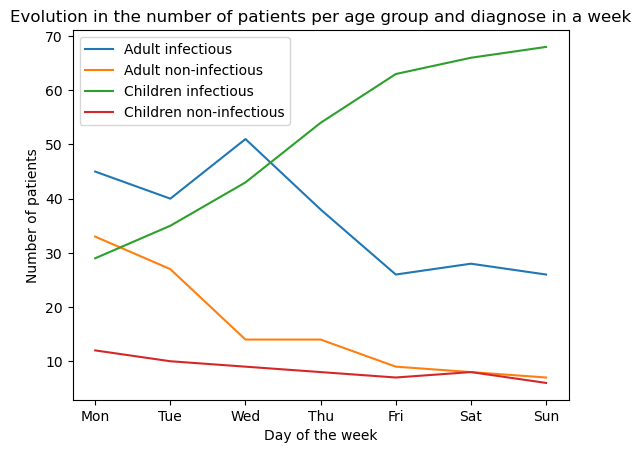

In [32]:
# Visualize the progression in the number of patients
# in the first week of the health emergency declaration

# Importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Establish the data
x_axis = [
    'Mon', 'Tue', 'Wed', 'Thu',
     'Fri', 'Sat', 'Sun'
]

adults_infectious = [45, 40, 51, 38, 26, 28, 26]
adults_noninfectious = [33, 27, 14, 14, 9, 8, 7]

children_infectious = [29, 35, 43, 54, 63, 66, 68]
children_noninfectious = [12, 10, 9, 8, 7, 8, 6]
  
# Plot the lines
plt.plot(x_axis, adults_infectious, label = "Adult infectious")
plt.plot(x_axis, adults_noninfectious, label = "Adult non-infectious")
plt.plot(x_axis, children_infectious, label = "Children infectious")
plt.plot(x_axis, children_noninfectious, label = "Children non-infectious")

# Display customized axis labels
plt.ylabel("Number of patients") 
plt.xlabel("Day of the week")

# Display the legend
plt.legend()

# Display the title
plt.title("Evolution in the number of patients per age group and diagnose in a week")

# Displaying the title
plt.show()

### 4.1 General formulation

* **Decision variables**: Quantity of physicians in each turn per level and type of disease, $x_{ij}$ with $0 \leq i$·

* **Objective**: <span style="color:red">Minimize</span> the difference between the optimal Intensivist-to-Patient ratio found by the cited paper and the actual one in the first week of the outbreak response.
$$\min_{x_ij} \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\left[\left(\frac{x_{ij}}{p_{ij}}-\frac{2}{15}\right)^2\right]$$

with $M = 12$ and $N = 7$.

* **Constraints**
    * The number of doctors in a given time period per day may not exceed the total number of physicians, so that they cannot have two shifts in one day).
    $$\sum_{i=0}^{M-1} x_{ij} \leq G, \quad G \triangleq \text{no. intensivists}$$

    * There must be at least 1 doctor per 14 patients
    $$\frac{x_{ij}}{p_{ij}} \geq \frac{1}{14} \qquad \forall \quad 0 \leq i \leq M-1, \quad 0 \leq j \leq N-1$$

    * There cannot be more than 1 doctor per 3 patients.
    $$\frac{x_{ij}}{p_{ij}} \leq \frac{1}{3} \qquad \forall \quad 0 \leq i \leq M-1, \quad 0 \leq j \leq N-1$$

    * There can never be a negative number of doctors $x_{ij}$.
    $$x_{ij} \geq 0 \qquad \forall \quad 0 \leq i \leq M-1, \quad 0 \leq j \leq N-1$$

This means that in total, we will have 84 decision variables $x_{ij}$ and 252 individual non-trivial constraints and a non-linear convex quadratic decision variable. The amenable character of this model allows us to adopt a hands-off approach with respect to the choice of the initial point vector and the nature of the constraints as well as the structure of the objective function (nominally defined in $\mathbb{R}$) avoid the presence of potential errors in its evaluation.

### 4.2 Non-linear programming implementation

In [15]:
%reset -f

# We reset environment variables
# to avoid reference errors

In [16]:
# We import the libraries that are needed
# for solving linear programming problems
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

# For performance analysis purposes
from time import process_time

# For saving the results returned by the solver
from pandas import Series, DataFrame

# For better code readability and maintanability
from typing import Final

# Define the constants
NUMBER_OF_INTENSIVISTS: Final = 24
WEEK: Final = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
SHIFTS: Final = ['MiA', 'MiC', 'MnA', 'MnC',
                 'AiA', 'AiC', 'AnA', 'AnC',
                 'NiA', 'NiC', 'NnA', 'NnC']

#### 4.2.1 Problem data definition: sets and parameters

In [17]:
# We define the continuous model
nonlinear_model = pyo.ConcreteModel()

# We create the labels of the 1st dimension of the continuous model
# that corresponds to the rows of our previously seen matrix
i_labels = SHIFTS

# We check that the the length of the 1st dimension
# is equal to 12
assert len(i_labels) == len(SHIFTS)

# We create the labels of the 2nd dimension of the continuous model
# that corresponds to the columns of our previously seen matrix
j_labels = WEEK

# We check the length of the 2nd dimension
# to be equal to 7
assert len(j_labels) == 7

# We initialize the model dimensions with the labels
# that were defined above
nonlinear_model.i = pyo.Set(initialize = i_labels, doc = "scenarios")
nonlinear_model.j = pyo.Set(initialize = j_labels, doc = "days of the week")

patient_forecast = {

    # In-Python used notation:
    # example: MiA <- morning shift, infectious disease, adult section
    # example: NnC <- night shift, non-infectious disease, children section

    # MORNING INFECTIOUS
    ('MiA', 'Mon'): 15,
    ('MiA', 'Tue'): 12,
    ('MiA', 'Wed'): 18,
    ('MiA', 'Thu'): 13,
    ('MiA', 'Fri'): 10,
    ('MiA', 'Sat'): 11,
    ('MiA', 'Sun'): 11,
    
    ('MiC', 'Mon'): 10,
    ('MiC', 'Tue'): 12,
    ('MiC', 'Wed'): 15,
    ('MiC', 'Thu'): 19,
    ('MiC', 'Fri'): 20,
    ('MiC', 'Sat'): 21,
    ('MiC', 'Sun'): 21,
    
    # MORNING NON-INFECTIOUS
    ('MnA', 'Mon'): 10,
    ('MnA', 'Tue'): 8,
    ('MnA', 'Wed'): 5,
    ('MnA', 'Thu'): 5,
    ('MnA', 'Fri'): 4,
    ('MnA', 'Sat'): 4,
    ('MnA', 'Sun'): 3,

    ('MnC', 'Mon'): 4,
    ('MnC', 'Tue'): 3,
    ('MnC', 'Wed'): 3,
    ('MnC', 'Thu'): 3,
    ('MnC', 'Fri'): 3,
    ('MnC', 'Sat'): 3,
    ('MnC', 'Sun'): 2,

    # AFTERNOON INFECTIOUS
    ('AiA', 'Mon'): 16,
    ('AiA', 'Tue'): 14,
    ('AiA', 'Wed'): 16,
    ('AiA', 'Thu'): 13,
    ('AiA', 'Fri'): 9,
    ('AiA', 'Sat'): 9,
    ('AiA', 'Sun'): 8,

    ('AiC', 'Mon'): 9,
    ('AiC', 'Tue'): 12,
    ('AiC', 'Wed'): 15,
    ('AiC', 'Thu'): 17,
    ('AiC', 'Fri'): 21,
    ('AiC', 'Sat'): 22,
    ('AiC', 'Sun'): 23,
    
    # AFTERNOON NON-INFECTIOUS
    ('AnA', 'Mon'): 11,
    ('AnA', 'Tue'): 9,
    ('AnA', 'Wed'): 4,
    ('AnA', 'Thu'): 5,
    ('AnA', 'Fri'): 3,
    ('AnA', 'Sat'): 2,
    ('AnA', 'Sun'): 2,

    ('AnC', 'Mon'): 4,
    ('AnC', 'Tue'): 3,
    ('AnC', 'Wed'): 3,
    ('AnC', 'Thu'): 3,
    ('AnC', 'Fri'): 2,
    ('AnC', 'Sat'): 2,
    ('AnC', 'Sun'): 2,

    # NIGHT INFECTIOUS
    ('NiA', 'Mon'): 14,
    ('NiA', 'Tue'): 14,
    ('NiA', 'Wed'): 17,
    ('NiA', 'Thu'): 12,
    ('NiA', 'Fri'): 7,
    ('NiA', 'Sat'): 8,
    ('NiA', 'Sun'): 7,
    
    ('NiC', 'Mon'): 10,
    ('NiC', 'Tue'): 11,
    ('NiC', 'Wed'): 13,
    ('NiC', 'Thu'): 18,
    ('NiC', 'Fri'): 22,
    ('NiC', 'Sat'): 23,
    ('NiC', 'Sun'): 24,
    
    # NIGHT NON-INFECTIOUS
    ('NnA', 'Mon'): 12,
    ('NnA', 'Tue'): 10,
    ('NnA', 'Wed'): 5,
    ('NnA', 'Thu'): 4,
    ('NnA', 'Fri'): 2,
    ('NnA', 'Sat'): 2,
    ('NnA', 'Sun'): 2,
    
    ('NnC', 'Mon'): 4,
    ('NnC', 'Tue'): 4,
    ('NnC', 'Wed'): 3,
    ('NnC', 'Thu'): 2,
    ('NnC', 'Fri'): 2,
    ('NnC', 'Sat'): 3,
    ('NnC', 'Sun'): 2
}

# We check the length of matrix
# to be equal to 84 (12 x 7)
assert len(patient_forecast.items()) == len(WEEK)*len(SHIFTS)

# We define the forescated number of patients per scenario and
# days of the week into the model. This information is
# crucial in the solution to the problem
nonlinear_model.patients = pyo.Param(nonlinear_model.i, nonlinear_model.j,
    initialize = patient_forecast, doc = "Forescasted patients per scenario and day of the week")

# Print the basic parts of the continuous model
nonlinear_model.pprint()

3 Set Declarations
    i : scenarios
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   12 : {'MiA', 'MiC', 'MnA', 'MnC', 'AiA', 'AiC', 'AnA', 'AnC', 'NiA', 'NiC', 'NnA', 'NnC'}
    j : days of the week
        Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'}
    patients_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    i*j :   84 : {('MiA', 'Mon'), ('MiA', 'Tue'), ('MiA', 'Wed'), ('MiA', 'Thu'), ('MiA', 'Fri'), ('MiA', 'Sat'), ('MiA', 'Sun'), ('MiC', 'Mon'), ('MiC', 'Tue'), ('MiC', 'Wed'), ('MiC', 'Thu'), ('MiC', 'Fri'), ('MiC', 'Sat'), ('MiC', 'Sun'), ('MnA', 'Mon'), ('MnA', 'Tue'), ('MnA', 'Wed'), ('MnA', 'Thu'), ('MnA', 'Fri'), ('MnA', 'Sat'), ('MnA', 'Sun'), ('MnC', 'Mon'), ('MnC', 'Tue'), ('MnC', 'Wed'), ('MnC', 'Thu')

#### 4.4.2 Define the variables

In [18]:
# We define variables x(i,j)
# that represent the number of intensivists
# per scenario, per day of the week
nonlinear_model.x = pyo.Var(nonlinear_model.i, nonlinear_model.j,
    doc = "Number of intensivists",
    within = pyo.NonNegativeReals)

print(nonlinear_model.x.display())

x : Number of intensivists
    Size=84, Index=x_index
    Key            : Lower : Value : Upper : Fixed : Stale : Domain
    ('AiA', 'Fri') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiA', 'Mon') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiA', 'Sat') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiA', 'Sun') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiA', 'Thu') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiA', 'Tue') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiA', 'Wed') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiC', 'Fri') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiC', 'Mon') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiC', 'Sat') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiC', 'Sun') :     0 :  None :  None : False :  True : NonNegativeReals
    ('AiC', 'Thu') :

#### 4.4.3 Define the objective function

In [19]:
# We define the objective function to be used
def nl_objective_rule(nl_model: pyo.ConcreteModel) -> float:
    return sum([((nl_model.x[i,j]/nl_model.patients[i,j])-(2/15))**2 for count, i in enumerate(nl_model.i) for j in nl_model.j])

In [20]:
# We instantiate the objective function for the model which is passed as a rule
# although Pyomo minimizes by default, we still explicitly specify this
nonlinear_model.objective = pyo.Objective(
                                            rule = nl_objective_rule,
                                            sense = pyo.minimize,
                                             doc = "Real-to-Optimal Intensivist-to-Patient ratio"
                                             )

# Visualize the objective function
nonlinear_model.objective.pprint()

objective : Real-to-Optimal Intensivist-to-Patient ratio
    Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : (0.06666666666666667*x[MiA,Mon] - 0.13333333333333333)**2 + (0.08333333333333333*x[MiA,Tue] - 0.13333333333333333)**2 + (0.05555555555555555*x[MiA,Wed] - 0.13333333333333333)**2 + (0.07692307692307693*x[MiA,Thu] - 0.13333333333333333)**2 + (0.1*x[MiA,Fri] - 0.13333333333333333)**2 + (0.09090909090909091*x[MiA,Sat] - 0.13333333333333333)**2 + (0.09090909090909091*x[MiA,Sun] - 0.13333333333333333)**2 + (0.1*x[MiC,Mon] - 0.13333333333333333)**2 + (0.08333333333333333*x[MiC,Tue] - 0.13333333333333333)**2 + (0.06666666666666667*x[MiC,Wed] - 0.13333333333333333)**2 + (0.05263157894736842*x[MiC,Thu] - 0.13333333333333333)**2 + (0.05*x[MiC,Fri] - 0.13333333333333333)**2 + (0.047619047619047616*x[MiC,Sat] - 0.13333333333333333)**2 + (0.047619047619047616*x[MiC,Sun] - 0.13333333333333333)**2 + (0.1*x[MnA,Mon] - 0.13333333333333333)*

#### 4.4.4 Define the constraints

In [21]:
# Function that establishes the constraint by which the solution to the number of doctors
# cannot be larger than the number of available medical staff
def nl_MaxStaffPerDay(nl_model: pyo.ConcreteModel, j: str) -> bool:
    return sum(nl_model.x[i,j] for i in nl_model.i) <= NUMBER_OF_INTENSIVISTS

In [22]:
# This constraint is now added to the model
nonlinear_model.maxStaffPerDay = pyo.Constraint(
    nonlinear_model.j,
    rule = nl_MaxStaffPerDay,
    doc = "Maximum number of doctors per day")

# Visualize the constraint maxStaffPerDay
nonlinear_model.maxStaffPerDay.pprint()

maxStaffPerDay : Maximum number of doctors per day
    Size=7, Index=j, Active=True
    Key : Lower : Body                                                                                                                                                      : Upper : Active
    Fri :  -Inf : x[MiA,Fri] + x[MiC,Fri] + x[MnA,Fri] + x[MnC,Fri] + x[AiA,Fri] + x[AiC,Fri] + x[AnA,Fri] + x[AnC,Fri] + x[NiA,Fri] + x[NiC,Fri] + x[NnA,Fri] + x[NnC,Fri] :  24.0 :   True
    Mon :  -Inf : x[MiA,Mon] + x[MiC,Mon] + x[MnA,Mon] + x[MnC,Mon] + x[AiA,Mon] + x[AiC,Mon] + x[AnA,Mon] + x[AnC,Mon] + x[NiA,Mon] + x[NiC,Mon] + x[NnA,Mon] + x[NnC,Mon] :  24.0 :   True
    Sat :  -Inf : x[MiA,Sat] + x[MiC,Sat] + x[MnA,Sat] + x[MnC,Sat] + x[AiA,Sat] + x[AiC,Sat] + x[AnA,Sat] + x[AnC,Sat] + x[NiA,Sat] + x[NiC,Sat] + x[NnA,Sat] + x[NnC,Sat] :  24.0 :   True
    Sun :  -Inf : x[MiA,Sun] + x[MiC,Sun] + x[MnA,Sun] + x[MnC,Sun] + x[AiA,Sun] + x[AiC,Sun] + x[AnA,Sun] + x[AnC,Sun] + x[NiA,Sun] + x[NiC,Sun] + x[NnA,Sun] +

In [23]:
# Function that implements the minimal Intensivist-to-Patients ratio that
# is minimally admissible taking into account healthcare standards
# for Level I (which only requires physicians during weekdays)
def nl_MinProportion(nl_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:
    for i in SHIFTS:
        for j in WEEK:
            constraintList.add(expr = nl_model.x[i,j]/nl_model.patients[i,j] >= 1/14)

    assert len(constraintList) == len(SHIFTS)*len(WEEK)
    constraintList.pprint()
    
    return

In [24]:
nonlinear_model.minproportions = pyo.ConstraintList()
nl_MinProportion(nonlinear_model, nonlinear_model.minproportions)

minproportions : Size=84, Index=minproportions_index, Active=True
    Key : Lower               : Body                            : Upper : Active
      1 : 0.07142857142857142 :  0.06666666666666667*x[MiA,Mon] :  +Inf :   True
      2 : 0.07142857142857142 :  0.08333333333333333*x[MiA,Tue] :  +Inf :   True
      3 : 0.07142857142857142 :  0.05555555555555555*x[MiA,Wed] :  +Inf :   True
      4 : 0.07142857142857142 :  0.07692307692307693*x[MiA,Thu] :  +Inf :   True
      5 : 0.07142857142857142 :                  0.1*x[MiA,Fri] :  +Inf :   True
      6 : 0.07142857142857142 :  0.09090909090909091*x[MiA,Sat] :  +Inf :   True
      7 : 0.07142857142857142 :  0.09090909090909091*x[MiA,Sun] :  +Inf :   True
      8 : 0.07142857142857142 :                  0.1*x[MiC,Mon] :  +Inf :   True
      9 : 0.07142857142857142 :  0.08333333333333333*x[MiC,Tue] :  +Inf :   True
     10 : 0.07142857142857142 :  0.06666666666666667*x[MiC,Wed] :  +Inf :   True
     11 : 0.07142857142857142 :  0.05263157

In [25]:
# Function that implements the minimal Intensivist-to-Patients ratio that
# is minimally admissible taking into account healthcare standards
# for Level I (which only requires physicians during weekdays)
def nl_MaxProportion(nl_model: pyo.ConcreteModel, constraintList: pyo.ConstraintList) -> None:
    for i in SHIFTS:
        for j in WEEK:
            constraintList.add(expr = nl_model.x[i,j]/nl_model.patients[i,j] <= 1/3)

    assert len(constraintList) == len(SHIFTS)*len(WEEK)
    constraintList.pprint()
    
    return

In [26]:
nonlinear_model.maxproportions = pyo.ConstraintList()
nl_MaxProportion(nonlinear_model, nonlinear_model.maxproportions)

maxproportions : Size=84, Index=maxproportions_index, Active=True
    Key : Lower : Body                            : Upper              : Active
      1 :  -Inf :  0.06666666666666667*x[MiA,Mon] : 0.3333333333333333 :   True
      2 :  -Inf :  0.08333333333333333*x[MiA,Tue] : 0.3333333333333333 :   True
      3 :  -Inf :  0.05555555555555555*x[MiA,Wed] : 0.3333333333333333 :   True
      4 :  -Inf :  0.07692307692307693*x[MiA,Thu] : 0.3333333333333333 :   True
      5 :  -Inf :                  0.1*x[MiA,Fri] : 0.3333333333333333 :   True
      6 :  -Inf :  0.09090909090909091*x[MiA,Sat] : 0.3333333333333333 :   True
      7 :  -Inf :  0.09090909090909091*x[MiA,Sun] : 0.3333333333333333 :   True
      8 :  -Inf :                  0.1*x[MiC,Mon] : 0.3333333333333333 :   True
      9 :  -Inf :  0.08333333333333333*x[MiC,Tue] : 0.3333333333333333 :   True
     10 :  -Inf :  0.06666666666666667*x[MiC,Wed] : 0.3333333333333333 :   True
     11 :  -Inf :  0.05263157894736842*x[MiC,Thu] : 0.

#### 4.4.5 Solve the non-linear programming model

In [27]:
Solver = SolverFactory('ipopt')
nonlinear_model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)
Results = Solver.solve(nonlinear_model, tee=True)
print(Results)

Ipopt 3.11.1: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.11.1, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      252
Number of nonzeros in Lagrangian Hessian.............:       84

Total number of variables............................:       84
                     variables with only lower bounds:       84
                variables with lower and upper bounds:        0


In [28]:
for i in SHIFTS:
    for j in WEEK:
        print(f"x[{i},{j}] = {pyo.value(nonlinear_model.x[i,j])}")

x[MiA,Mon] = 2.000000396030046
x[MiA,Tue] = 1.6000003245535332
x[MiA,Wed] = 2.400000467434914
x[MiA,Thu] = 1.7333336824732744
x[MiA,Fri] = 1.3333336080636393
x[MiA,Sat] = 1.4666669663502099
x[MiA,Sun] = 1.4666669669665893
x[MiC,Mon] = 1.3333336056185965
x[MiC,Tue] = 1.6000003245535332
x[MiC,Wed] = 2.000000396827746
x[MiC,Thu] = 2.5333338257502964
x[MiC,Fri] = 2.6666671878718913
x[MiC,Sat] = 2.800000540692921
x[MiC,Sun] = 2.800000542889503
x[MnA,Mon] = 1.3333336056185965
x[MnA,Tue] = 1.0666668878788708
x[MnA,Wed] = 0.6666668069606914
x[MnA,Thu] = 0.666666807106516
x[MnA,Fri] = 0.5333334465382278
x[MnA,Sat] = 0.5333334464070717
x[MnA,Sun] = 0.4000000852949354
x[MnC,Mon] = 0.5333334461633263
x[MnC,Tue] = 0.4000000852218513
x[MnC,Wed] = 0.4000000851408456
x[MnC,Thu] = 0.4000000851932676
x[MnC,Fri] = 0.4000000853251875
x[MnC,Sat] = 0.40000008525140257
x[MnC,Sun] = 0.2666667238182922
x[AiA,Mon] = 2.133333753109976
x[AiA,Tue] = 1.8666670410232302
x[AiA,Wed] = 2.1333337540181962
x[AiA,Thu] = 1

In [29]:
print(pyo.value(nonlinear_model.objective))

6.33458445962465e-14


#### 4.4.6 Interpret the non-linear programming model results

##### 4.4.6.1 Interpretation of the model output metadata

The information returned by the solver IPOPT states that the process was completed correctly ($ok$ code) and that it succeded in obtaining the optimal solution (see the exit code *Optimal Solution Found*). The fact that this model is a convex non-linear quadratic constrained one makes this statement consistent with the theorical solution.

The output given by IPOPT states that there are 252 nonzeros in the inequaliy constraint Jacobian, this is what is expected, and covers all of the constraints that were specified. Same occurs for the Lagrangian Hessian, which has 84 nonzeros: the total number of variables $x_{ij}$.

Given that this is a convex non-linear constrained optimization problem, the number of iterations that were need to achieve the global minimum by Ipopt were 14. The algorithm started at iteration 0 in a point whose unscaled objective function value was $1.4494690$; each iteration brought a monotonically decreasing objective value, ending at iteration 14 with the value $6.3345845·10^{-14}$ (a numerical zero) which is excellent news given that this solutions minimizes the negative effect excerted by suboptimal intensivist-to-patient ratios that increase mortality.

The unscaled constraint violation (*inf\_pr*) starts at $7.10·10^{-2}$ and decreases quickly: at iteration 3 it is already $0$. The scaled dual infeasibility (*inf\_du*) starts with the value $5.84·10^{-2}$, then fluctuates, sometimes increase, e.g. at iteration 3, with $1.10·10^{2}$, but it ultimately decreases up to the end with iteration 14 having the value $2.51·10^{-14}$ (a numerical zero).

Recall that IPOPT is a barrier method as it relaxes the constraint $x\geq 0$ into a barrier term, and decreases this paratemer at each iteration. Specifically, for an original non-linear programming problem (this process can be seen in the *lg(mu)* result column):

$$\min_{x}f(x)$$

such that 

$$c(x)=0$$

and

$$x \geq 0$$

which  is turned into a new, barrier non-linear programming problem:

$$\min_{x} f(x) - \mu · \sum_{i}log(x_i)$$

such that 

$$c(x) = 0$$

with $x \rightarrow 0$, $\mu \rightarrow 0$, $log(x) \rightarrow \infty$ and $x^{*}(\mu) \rightarrow x^{*}$

In this process IPOPT initializes $x_0 > 0$, $\mu_0 > 0$ and starts to count $l \leftarrow 0$. Then the barrier problem is solver for $\mu_l$, the barrier is decreased monotonically $\mu_l > \mu_{l+1}$. Finally the counter is updated: $l \leftarrow l+1$.

We can also see that the infinity normal of the primal step $||d||$ decreases from $0$ at iteration 0 to $1.9·10^{-3}$. For the decimal base logarithm of the regularization - column *lg(rg)* - it can be clearly seen that regularization has not even been performed, due to the aforecited conditions of the problem that make it more amenable.

*alpha_du* corresponds to the stepsize that is taken for dual variables and *alpha_pr* corresponds to the stepsize that is taken for primal variables. This last one is accompanied by letter, for instance at iteration 2 we have $1.97·10^{-2}h$, this lowecase h refers to an h-type iteration without second order corrections; another example is iteration 8 with $1f$ where lowercase f refers to an f-type iteration without second order corrections.

The last colum *ls* refers to the steps that were performed for backtracking line search. Recall that this is a methiod employed to determine which is the best distance to move in either direction given a search vector; this process is stopped when the Armijo-Goldstein condition is met. All iterations have the value $1$ except for the initial one which naturally has $0$.

The dual infeasibility of the model, $2.501·10^{-14}$ corresponds to a numerical zero. There is no constraint violation and both the complementarity and overall non-linear programming error is extremely small.

##### 4.4.6.2 Interpretation of the model variable results

Similarly to the case of the continuous model of the first homewor, this model is useful as it provides a simple enough overview of the scheduling problem in a quantitative fashion that would allow a hospital manager to have an idea of the number of physicians that should be assigned to each scenario in order to improve the quality of medical care during an epidemic emergency by reducing mortality as much as possible when resources are especially scarce and they are to be directed towards a specific diagnostic profile: children with an infectious disease.

In the same way, integer values are directly interpretable as a value of “2” for $\text{x[MiA,Mon]}$, i.e., the number of doctors to be present at the adult infectious disease unit at the morning, is a clear indicator that 2 physicians are needed in that shift but, what about the non-integer values? These values are not cannot be meaningfully interpreted by themselves alone, but they provide insighful information when paired with other results at the same time slot.

It too holds that:

> In a moment when resources are critically scarce, it may be useful to employ a doctor that is already working in another concurrent scenario; for example, in two concurrent scenarios, A with result 1.8 and B with result 0.8, it may be interpreted that a doctor assigned in B could devote 20% of its efforts in helping his/her fellow doctors in scenario A where there is tighter need for 2 doctors rather than only one.

A particular example in the dataset is that (‘’,’ Tue’) has a value of 0.5 and a concurrent scenario (‘E3i’,’ Tue’) has a value of 0.583. In this case, a single doctor would be better employed by assisting both areas half of the time; roughly 50%, 50% as it is per the results given by the optimizer. Other similar case arises throughout the solution set.

#### 4.4.7 Sensitivities and their interpretation

In [30]:
nonlinear_model.dual.display()

dual : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key                 : Value
    maxStaffPerDay[Fri] : -2.1983065470191738e-10
    maxStaffPerDay[Mon] : -2.5497145161718736e-10
    maxStaffPerDay[Sat] : -2.3192249103556756e-10
    maxStaffPerDay[Sun] : -2.2478344815867113e-10
    maxStaffPerDay[Thu] : -2.4164031566019587e-10
    maxStaffPerDay[Tue] :  -2.357306949095915e-10
    maxStaffPerDay[Wed] : -2.4994684119041334e-10
     maxproportions[10] : -1.1808945866153216e-08
     maxproportions[11] : -1.1825489460564069e-08
     maxproportions[12] : -1.1818722204922236e-08
     maxproportions[13] : -1.1829604324698924e-08
     maxproportions[14] : -1.1825452025156918e-08
     maxproportions[15] : -1.1784435886830801e-08
     maxproportions[16] : -1.1770511027176105e-08
     maxproportions[17] : -1.1757899219081997e-08
     maxproportions[18] : -1.1756707813275521e-08
     maxproportions[19] : -1.1749587771836558e-08
      maxproportions[1] : -1.1811314365989172e-08
     maxpropor

## 5. Bibliography